# Parcial 1 
Estrada Montaño Abril Minerva

https://github.com/Carcinogenetista01

## Problema 1
Respecto al artículo Computing machinery and inteligence de Alan Turing, selecciona alguna de las visiones opuestas a la pregunta principal que no sea The Teological Objection y: (5p)
- a) descríbela brevemente
- b) argumenta si estás a favor o en contra de la misma


### a) Descripción  
Este argumento sostiene que, aunque una máquina pudiera realizar tareas que parecen inteligentes, no tiene conciencia, sentimientos o experiencias subjetivas (qualia). Según esta visión, pensar no solo implica procesar información o dar respuestas correctas, sino también tener experiencias internas, como la sensación de ser. Un defensor de esta postura es el filósofo John Searle con su experimento mental conocido como la Habitación China, que sugiere que seguir reglas sintácticas no implica conciencia.

### b) ¿A favor o en contra?  
Estoy en contra de este argumento. Aunque las máquinas actuales no tengan conciencia, no hay evidencia concluyente que indique que esta sea una condición necesaria para pensar. La inteligencia puede abordarse de una manera funcional: si una máquina actúa y responde como si entendiera, ¿no sería lógico decir que pensó esa respuesta? Además, la conciencia sigue siendo un concepto ambiguo incluso en los humanos, y no hay certeza sobre si solo un cerebro biológico puede generar este tipo de experiencia subjetiva. Por tanto, limitar la capacidad de pensar únicamente a sistemas conscientes parece ser una forma de sesgo.

# Problema 2
Respecto a la Agenda Nacional Mexicana de Inteligencia Artificial, elige alguna sección contrasta las conclusiones mencionadas con el estado actual de desarrollo en esa área (5p)

La **Agenda Nacional de Inteligencia Artificial** de México reconoce que para avanzar en IA, es clave mejorar la educación y formación

1. **Faltan expertos en IA**: Aunque ha habido avances, como nuevos programas en universidades (UNAM, Tec de Monterrey), todavía no hay suficientes profesionales para cubrir la demanda en la industria.
  
2. **Actualización de programas de estudio**: Algunas universidades ya incluyen IA en varias carreras, pero no se ha implementado en niveles básicos (primaria), y esto genera una brecha digital entre zonas urbanas y rurales.

3. **Colaboración entre academia e industria**: Existen proyectos entre universidades y empresas tecnológicas, pero no están bien distribuidos ni organizados a nivel nacional.

4. **Infraestructura tecnológica**: Aunque hay laboratorios de IA en algunas universidades, la falta de recursos en otras limita las oportunidades para muchos estudiantes.

**En resumen**, México ha avanzado, pero los problemas que identificó la Agenda (como la falta de expertos, infraestructura y actualización de programas) aún son obstáculos importantes para convertirse en un líder en IA. Para solucionarlo, se necesita más inversión y una colaboración más cercana entre la academia y las empresas.

# Problema 3
Selecciona las dos características más importantes para el conjunto de datos Iris y con ellas
obtén las funciones discriminantes de: (10p)
- a) Un clasificador determinista a priori
- b) Un clasificador estadistico a prior

Accuracy del clasificador determinista (KNN): 1.0
Accuracy del clasificador estadístico (LDA): 1.0


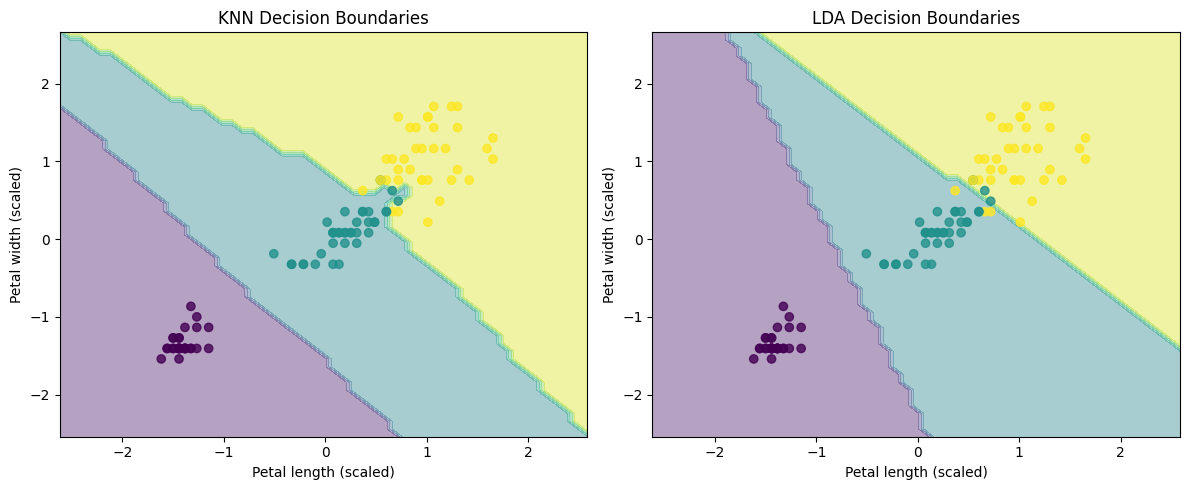

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Seleccionar las dos características más importantes
# Elegimos 'petal length' y 'petal width' (índices 2 y 3)
X_selected = X[:, [2, 3]]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a) Clasificador determinista a priori (K-Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print("Accuracy del clasificador determinista (KNN):", knn.score(X_test_scaled, y_test))

# b) Clasificador estadístico a priori (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
print("Accuracy del clasificador estadístico (LDA):", lda.score(X_test_scaled, y_test))

# Visualización de las funciones discriminantes
plt.figure(figsize=(12, 5))

# Plot para KNN
plt.subplot(121)
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, alpha=0.8)
plt.title("KNN Decision Boundaries")
plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")

# Plot para LDA
plt.subplot(122)
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, alpha=0.8)
plt.title("LDA Decision Boundaries")
plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")

plt.tight_layout()
plt.show()

# Problema 4
Para la implementación propia del Perceptrón, simula el funcionamiento del método One versus All con ayuda del conjunto de datos Iris y evalúa cada modelo, puede ser con una métrica o una gráfica (10p)

Accuracy: 0.73


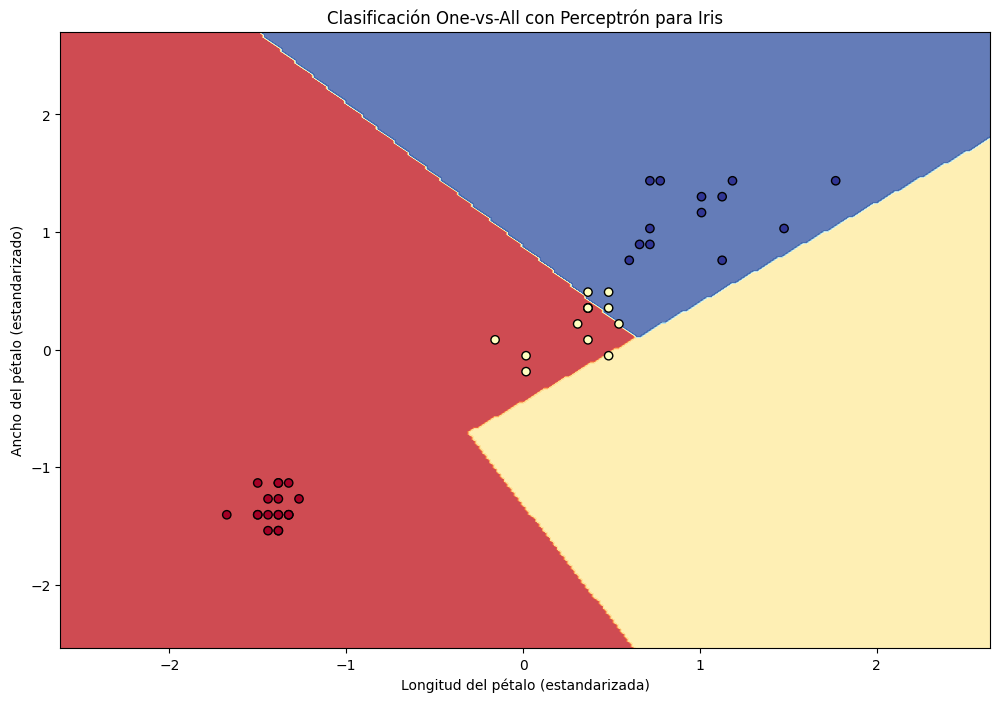

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Implementación del Perceptrón
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = 1 if linear_output >= 0 else 0
                
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Cargar y preparar los datos
iris = load_iris()
X = iris.data[:, [2, 3]]  # Usamos solo longitud y ancho del pétalo
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementar One-vs-All
perceptrons = []
for i in range(3):  # 3 clases en Iris
    y_train_binary = np.where(y_train == i, 1, 0)
    perceptron = Perceptron()
    perceptron.fit(X_train_scaled, y_train_binary)
    perceptrons.append(perceptron)

# Función para predecir usando One-vs-All
def predict_one_vs_all(X):
    predictions = np.array([p.predict(X) for p in perceptrons]).T
    return np.argmax(predictions, axis=1)

# Evaluar el modelo
y_pred = predict_one_vs_all(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualización
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = predict_one_vs_all(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.xlabel('Longitud del pétalo (estandarizada)')
plt.ylabel('Ancho del pétalo (estandarizado)')
plt.title('Clasificación One-vs-All con Perceptrón para Iris')
plt.show()

 # Problema 5
Para el conjunto de datos de vinos: (15p)
- a) Aplica la regresión logística al conjunto completo reducido y evalúa su rendimiento
- b) Con ayuda de PCA, determina el número de componentes que conservan el 75% de la
información y realiza la reducción a ese número de componentes
- c) Aplica la regresión logística al conjunto reducido con PCA y evalúa su rendimiento
- d) Reduce al mismo número de componentes con ayuda de LDA
- e) Aplica la regresión logística al conjunto reducido con LDA y evalúa su rendimiento

Accuracy de la regresión logística en el conjunto completo: 0.9814814814814815
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Número de componentes PCA que conservan el 75% de la información: 5
Accuracy de la regresión logística con PCA: 0.9814814814814815
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Número de componentes LDA: 2

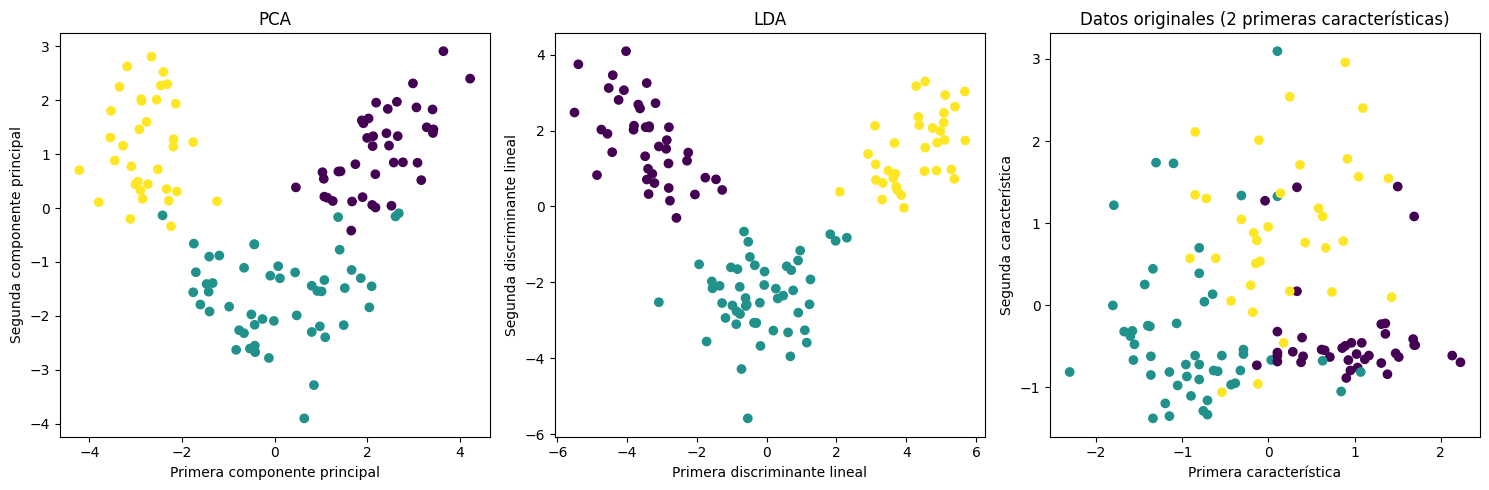

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos de vinos
wine = load_wine()
X = wine.data
y = wine.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a) Aplicar la regresión logística al conjunto completo
logistic_full = LogisticRegression(max_iter=1000, random_state=42)
logistic_full.fit(X_train_scaled, y_train)
y_pred_full = logistic_full.predict(X_test_scaled)
print("Accuracy de la regresión logística en el conjunto completo:", accuracy_score(y_test, y_pred_full))
print(classification_report(y_test, y_pred_full, target_names=wine.target_names))

# b) PCA para determinar el número de componentes que conservan el 75% de la información
pca = PCA(n_components=0.75, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Número de componentes PCA que conservan el 75% de la información:", pca.n_components_)

# c) Aplicar la regresión logística al conjunto reducido con PCA
logistic_pca = LogisticRegression(max_iter=1000, random_state=42)
logistic_pca.fit(X_train_pca, y_train)
y_pred_pca = logistic_pca.predict(X_test_pca)
print("Accuracy de la regresión logística con PCA:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))

# d) Reducir con LDA
n_components_lda = min(len(np.unique(y)) - 1, X_train_scaled.shape[1])
lda = LDA(n_components=n_components_lda)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
print("Número de componentes LDA:", n_components_lda)

# e) Aplicar la regresión logística al conjunto reducido con LDA
logistic_lda = LogisticRegression(max_iter=1000, random_state=42)
logistic_lda.fit(X_train_lda, y_train)
y_pred_lda = logistic_lda.predict(X_test_lda)
print("Accuracy de la regresión logística con LDA:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda, target_names=wine.target_names))

# Visualización de los resultados
plt.figure(figsize=(15, 5))

# PCA
plt.subplot(131)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA')
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')

# LDA
plt.subplot(132)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis')
plt.title('LDA')
plt.xlabel('Primera discriminante lineal')
plt.ylabel('Segunda discriminante lineal')

# Original (primeras dos características)
plt.subplot(133)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis')
plt.title('Datos originales (2 primeras características)')
plt.xlabel('Primera característica')
plt.ylabel('Segunda característica')

plt.tight_layout()
plt.show()

# Problema 6 
Elige:
- a) Matriz de covarianzas
- b) Matriz de dispersión
y escribe un código que obtenga la obtenga desde cero

In [18]:
# Función para calcular la matriz de covarianzas desde cero
def calcular_matriz_covarianzas(datos):
    # Convertir los datos a un arreglo de NumPy
    datos = np.array(datos)
    
    # Calcular el vector de medias
    vector_medias = np.mean(datos, axis=0)
    
    # Centrar los datos restando el vector de medias
    datos_centrados = datos - vector_medias
    
    # Calcular la matriz de covarianzas
    n_muestras = datos.shape[0]
    matriz_covarianzas = np.dot(datos_centrados.T, datos_centrados) / (n_muestras - 1)
    
    return matriz_covarianzas

# Ejemplo de uso
datos = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

covarianzas = calcular_matriz_covarianzas(datos)
print("Matriz de covarianzas:")
print(covarianzas)

Matriz de covarianzas:
[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]


In [19]:
import numpy as np

def calcular_matriz_dispersion(datos):
    # Convertir los datos a un arreglo de NumPy
    datos = np.array(datos)
    
    # Calcular el vector de medias
    vector_medias = np.mean(datos, axis=0)
    
    # Centrar los datos restando el vector de medias
    datos_centrados = datos - vector_medias
    
    # Calcular la matriz de dispersión
    matriz_dispersion = np.dot(datos_centrados.T, datos_centrados)
    
    return matriz_dispersion

# Ejemplo de uso
datos = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

dispersion = calcular_matriz_dispersion(datos)
print("Matriz de dispersión:")
print(dispersion)

Matriz de dispersión:
[[18. 18. 18.]
 [18. 18. 18.]
 [18. 18. 18.]]


# Pregunta 7
Implementa desde cero *Kernel PCA* con la siguiente función de kernel:

$$
k\left( x^{(i)}, x^{(j)} \right) = \alpha + \sum_{l=0}^{n-1} \left( x^{(i)}_l \cdot x^{(j)}_l \right)
$$

Después prueba su funcionamiento para separar círculos concéntricos; compara los resultados con el uso de PCA sobre los mismos datos. (15p)

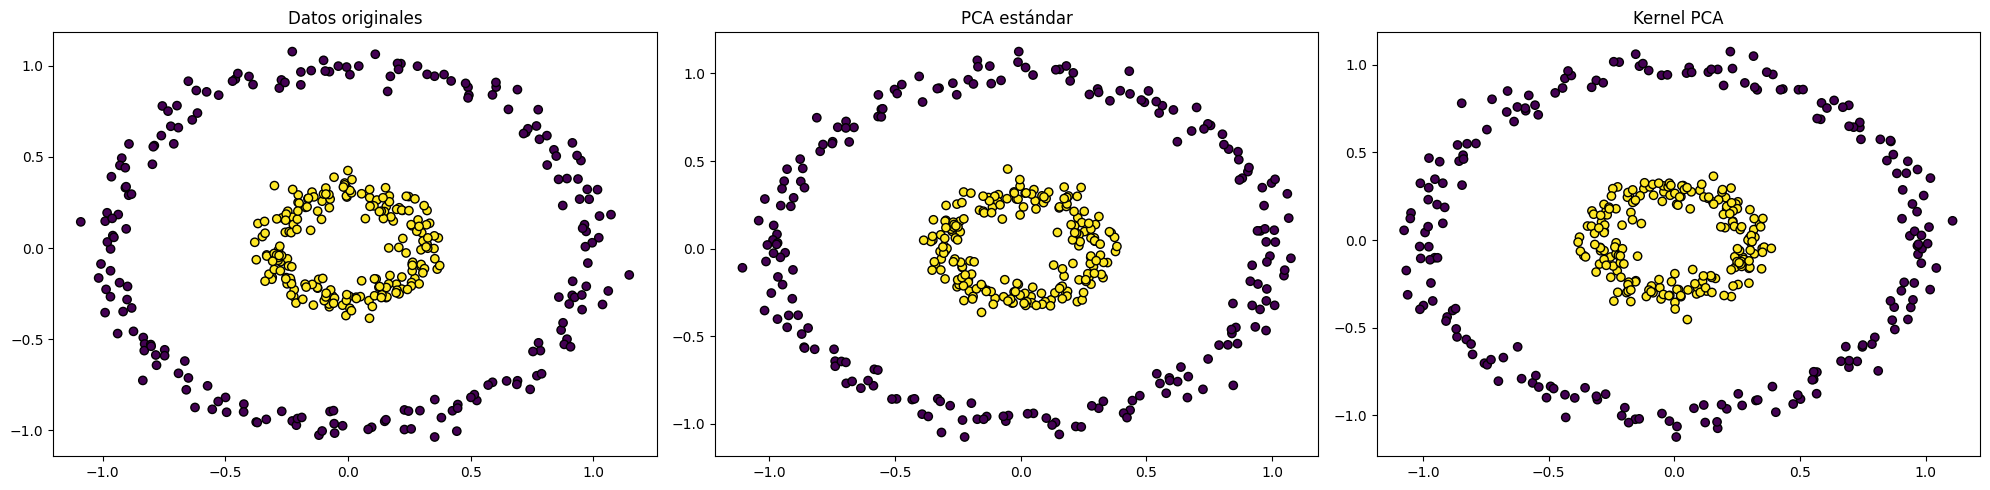

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_circles

# 1. Función de kernel
def kernel_function(x_i, x_j, alpha=1.0):
    return alpha + np.dot(x_i, x_j)

# 2. Implementación de Kernel PCA
def kernel_pca(X, n_components=2, alpha=1.0):
    n_samples = X.shape[0]
    
    # Calcular la matriz de kernel
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_function(X[i], X[j], alpha)
    
    # Centrar la matriz de kernel
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Calcular los autovalores y autovectores
    eigvals, eigvecs = np.linalg.eigh(K_centered)
    
    # Ordenar los autovalores y autovectores en orden descendente
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    # Proyectar los datos
    return eigvecs[:, :n_components] * np.sqrt(eigvals[:n_components])

# 3. Generar datos de círculos concéntricos
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05, random_state=42)

# 4. Aplicar PCA estándar y Kernel PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_kpca = kernel_pca(X, n_components=2, alpha=1.0)

# 5. Visualizar y comparar los resultados
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Datos originales')

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA estándar')

plt.subplot(1, 3, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Kernel PCA')

plt.tight_layout()
plt.show()


# Pregunta 8
Elige dos estimadores y demuestra que definen algoritmos escalables (10p):

$$
\bar{x} = n^{-1} \left[ \sum_{i=1}^{n} x_{i,1}, \ldots, \sum_{i=1}^{n} x_{i,p} \right]^T
$$

$$
\hat{\sigma}_j^2 = n^{-1} \sum_{i=1}^{n} x_{i,j}^2 - \bar{x}_j^2
$$ 

$$
\hat{\sigma}_{jk} = n^{-1} \sum_{i=1}^{n} x_{i,j} x_{i,k} - \bar{x}_j \bar{x}_k
$$




La media muestral $$\bar{x}$$ se define como:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i = \frac{1}{n} \left[ \sum_{i=1}^{n} x_{i,1}, \dots, \sum_{i=1}^{n} x_{i,p} \right]^\top
$$

Donde:

- $x_i = x_{i,1}, x_{i,2}, \dots, x_{i,p}^\top \in \mathbb{R}^p$ es el vector de la (i)-ésima observación.
- $n$ es el número de observaciones.
- $p$ es el número de dimensiones o características.


La varianza muestral en la (j)-ésima dimensión se define como:

$$
\hat{\sigma}_j^2 = \frac{1}{n} \sum_{i=1}^{n} x_{i,j}^2 - \bar{x}_j^2
$$

Donde:

- $x_{i,j}$ es el valor de la (i)-ésima observación en la dimensión (j).
- $\bar{x}_j$ es la media muestral en la dimensión (j), ya calculada.


---



Consideremos el estimador de la media muestral:

$$
\bar{x}_j = \frac{1}{n} \sum_{i=1}^{n} x_{i,j}
$$



Para calcular $$\bar{x}_j$$ en cada dimensión $$j$$, se deben sumar los $$n$$ valores $$x_{i,j}$$. Esto involucra $$n$$ operaciones de suma.

Dado que hay $$p$$ dimensiones en total, el número total de operaciones necesarias para calcular $$\bar{x}$$ es:

$$
\text{Número total de operaciones} = O(n \cdot p)
$$


El cálculo de la media muestral en cada dimensión $$j$$ es independiente de las demás dimensiones. Esto implica que podemos realizar el cálculo de la media en cada dimensión de manera paralela.

Formalmente, podemos dividir el conjunto de observaciones $$S = \{1, \dots, n\}$$ en $$K$$ subconjuntos $$S_k$$ para calcular las sumas parciales en paralelo:

$$
\sum_{i=1}^{n} x_{i,j} = \sum_{k=1}^{K} \sum_{i \in S_k} x_{i,j}
$$

Cada subconjunto $$S_k$$ puede ser procesado en paralelo, lo que permite reducir el tiempo total de cómputo. En un sistema con $$K$$ procesadores, el tiempo requerido se reduce a $$O\left(\frac{n \cdot p}{K}\right)$$.



El cálculo de la media muestral tiene una complejidad de $$O(n \cdot p)$$ y es paralelizable de manera eficiente. Por lo tanto, el estimador de la media muestral es **escalable**.

---



Consideremos ahora el estimador de la varianza muestral:

$$
\hat{\sigma}_j^2 = \frac{1}{n} \sum_{i=1}^{n} x_{i,j}^2 - \bar{x}_j^2
$$



Para calcular $$\hat{\sigma}_j^2$$, debemos:

Calcular la suma de los cuadrados** de los valores $$x_{i,j}^2$$, lo que requiere $$n$$ operaciones.
Restar el cuadrado de la media $$\bar{x}_j^2$$, que ya fue calculado en el paso anterior.

El número total de operaciones necesarias para calcular $$\hat{\sigma}_j^2$$ en cada dimensión es $$O(n)$$.

Dado que hay $$p$$ dimensiones en total, el número total de operaciones es:

$$
\text{Número total de operaciones} = O(n \cdot p)
$$



De manera similar al cálculo de la media, el cálculo de $$\hat{\sigma}_j^2$$ en cada dimensión $$j$$ es independiente de las demás dimensiones. Esto significa que podemos paralelizar el cálculo de la varianza en las $$p$$ dimensiones.

Además, el cálculo de la suma de los cuadrados se puede dividir en subconjuntos $$S_k$$ para procesar en paralelo:

$$
\sum_{i=1}^{n} x_{i,j}^2 = \sum_{k=1}^{K} \sum_{i \in S_k} x_{i,j}^2
$$

Cada subconjunto puede ser procesado en paralelo, lo que reduce el tiempo de cómputo a $$O\left(\frac{n \cdot p}{K}\right)$$ en un sistema con $$K$$ procesadores.


El cálculo de la varianza muestral también tiene una complejidad de $$O(n \cdot p)$$ y es paralelizable de manera eficiente. Por lo tanto, el estimador de la varianza muestral es escalable.

---


Ambos estimadores, la media muestral y la varianza muestral por dimensión, tienen una complejidad de $$O(n \cdot p)$$, lo que significa que el tiempo de cómputo crece de manera lineal con el número de observaciones $$n$$ y la dimensionalidad $$p$$ Además, ambos estimadores son paralelizables, lo que los hace escalables en sistemas con múltiples procesadores.

Por lo tanto, estos estimadores definen algoritmos escalables.


# Pregunta 9
Escribe un código que obtenga la matriz de momentos aumentada a partir de un conjunto de vectores de datos: **(15p)**

$$
\mathbf{A}_{(p+1) \times (p+1)} = \sum_{i} \mathbf{w}_i \mathbf{w}_i^T =
\begin{bmatrix}
n & \sum x_{i,1} & \sum x_{i,2} & \dots & \sum x_{i,p} \\
\sum x_{i,1} & \sum x_{i,1}^2 & \sum x_{i,1} x_{i,2} & \dots & \sum x_{i,1} x_{i,p} \\
\sum x_{i,2} & \sum x_{i,1} x_{i,2} & \sum x_{i,2}^2 & \dots & \sum x_{i,2} x_{i,p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum x_{i,p} & \sum x_{i,1} x_{i,p} & \sum x_{i,2} x_{i,p} & \dots & \sum x_{i,p}^2
\end{bmatrix}
$$


In [21]:
import numpy as np

def matriz_momentos_aumentada(X: np.ndarray) -> np.ndarray:
    """
    Calcula la matriz de momentos aumentada de un conjunto de datos X.

    Parámetros
    ----------
    X : numpy.ndarray
        Una matriz 2D de numpy donde las filas son las muestras y las columnas son las características.
    
    Retorna
    -------
    numpy.ndarray
        La matriz de momentos aumentada de X.
    """
    # Paso 1: Obtener dimensiones
    n, p = X.shape

    # Paso 2: Crear matriz aumentada
    W = np.hstack([np.ones((n, 1)), X])

    # Paso 3: Calcular la matriz de momentos aumentada
    A = W.T @ W

    return A

# Ejemplo de uso
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

matriz_aumentada = matriz_momentos_aumentada(X)
print("Matriz de Momentos Aumentada:")
print(matriz_aumentada)

Matriz de Momentos Aumentada:
[[  3.  12.  15.  18.]
 [ 12.  66.  78.  90.]
 [ 15.  78.  93. 108.]
 [ 18.  90. 108. 126.]]


# Pregunta 10
Obten las expresiones para determinar los intervalos de contenedores para histogramas bidimensionales en función del número de contenedores

In [22]:
import numpy as np

def calcular_intervalos_contenedores(X, num_contenedores):
    """
    Calcula los intervalos de contenedores para un histograma bidimensional.

    Parameters
    ----------
    X : numpy.ndarray
        Un array 2D donde las filas son las muestras y las columnas son las características.
    num_contenedores : int
        El número de contenedores deseado en cada dimensión.
    
    Returns
    -------
    tuple
        Dos arrays que contienen los límites de los contenedores para cada dimensión.
    """
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    intervalos = []

    for min_val, max_val in zip(min_vals, max_vals):
        intervalos.append(np.linspace(min_val, max_val, num_contenedores + 1))

    return intervalos

# Ejemplo de uso
X = np.random.rand(100, 2)  # Datos aleatorios bidimensionales
num_contenedores = 10
intervalos = calcular_intervalos_contenedores(X, num_contenedores)

print("Intervalos para la primera dimensión:", intervalos[0])
print("Intervalos para la segunda dimensión:", intervalos[1])

Intervalos para la primera dimensión: [0.0162408  0.11230117 0.20836154 0.30442191 0.40048228 0.49654265
 0.59260303 0.6886634  0.78472377 0.88078414 0.97684451]
Intervalos para la segunda dimensión: [0.00794193 0.10689844 0.20585495 0.30481146 0.40376798 0.50272449
 0.601681   0.70063751 0.79959403 0.89855054 0.99750705]


# Pregunta 11
 Dentro del paquete sklear. datasets, existe un generador de datos para regresión llamado ma-
ke_regression:
- a) revisa en la documentación cómo generar un conjunto de datos con los siguientes pará-metros: (15p)
50 muestras de 7 características, ruido=20,
resultados
un valor de tu elección en la semilla del generador de número aleatorios para replicar tus
- b) Separa los datos de entrenamiento y pruebas con una semilla establecida para replicar el
experimento
- c) Aplica regresión lineal al conjunto de entrenamiento
- d) Evalúa el resultado sobre el mismo conjunto de entrenamiento y después sobre el de pruebas

In [23]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# a) Generamos el conjunto de datos con make_regression
n_samples = 50
n_features = 7
noise = 20
random_state = 42  # Semilla para replicabilidad

X, y = make_regression(n_samples=n_samples, 
                       n_features=n_features, 
                       noise=noise, 
                       random_state=random_state)

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

# b) Separamos los datos en conjuntos de entrenamiento y prueba
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")

# c) Aplicamos regresión lineal al conjunto de entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# d) Evaluamos el resultado sobre el conjunto de entrenamiento y de pruebas
# Conjunto de entrenamiento
y_pred_train = modelo.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"R² en el conjunto de entrenamiento: {r2_train:.4f}")

# Conjunto de pruebas
y_pred_test = modelo.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"R² en el conjunto de prueba: {r2_test:.4f}")

Forma de X: (50, 7)
Forma de y: (50,)
Forma de X_train: (35, 7)
Forma de X_test: (15, 7)
R² en el conjunto de entrenamiento: 0.9871
R² en el conjunto de prueba: 0.9596


# Pregunta 12
Con los datos del problema anterior, escribe un código para comparar el resultado de la regresión lineal estándar y el uso de las regularizaciones Ridge y ElasticNet con al menos dos valores diferentes para los parámetros de regularización (10p)

In [24]:
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Regresión lineal estándar (ya la tenemos del problema anterior)
print("Regresión Lineal Estándar:")
print(f"R² en el conjunto de prueba: {r2_test:.4f}")
mse_linear = mean_squared_error(y_test, y_pred_test)
print(f"MSE en el conjunto de prueba: {mse_linear:.4f}\n")

# Ridge Regression con diferentes valores de alpha
alphas_ridge = [0.1, 1.0]
for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print(f"Ridge Regression (alpha={alpha}):")
    print(f"R² en el conjunto de prueba: {r2_ridge:.4f}")
    print(f"MSE en el conjunto de prueba: {mse_ridge:.4f}\n")

# ElasticNet con diferentes valores de alpha y l1_ratio
alphas_elastic = [0.1, 1.0]
l1_ratios = [0.5, 0.7]
for alpha in alphas_elastic:
    for l1_ratio in l1_ratios:
        elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic.fit(X_train, y_train)
        y_pred_elastic = elastic.predict(X_test)
        r2_elastic = r2_score(y_test, y_pred_elastic)
        mse_elastic = mean_squared_error(y_test, y_pred_elastic)
        print(f"ElasticNet (alpha={alpha}, l1_ratio={l1_ratio}):")
        print(f"R² en el conjunto de prueba: {r2_elastic:.4f}")
        print(f"MSE en el conjunto de prueba: {mse_elastic:.4f}\n")

Regresión Lineal Estándar:
R² en el conjunto de prueba: 0.9596
MSE en el conjunto de prueba: 501.9300

Ridge Regression (alpha=0.1):
R² en el conjunto de prueba: 0.9596
MSE en el conjunto de prueba: 501.8534

Ridge Regression (alpha=1.0):
R² en el conjunto de prueba: 0.9581
MSE en el conjunto de prueba: 520.9069

ElasticNet (alpha=0.1, l1_ratio=0.5):
R² en el conjunto de prueba: 0.9549
MSE en el conjunto de prueba: 560.4658

ElasticNet (alpha=0.1, l1_ratio=0.7):
R² en el conjunto de prueba: 0.9576
MSE en el conjunto de prueba: 527.1317

ElasticNet (alpha=1.0, l1_ratio=0.5):
R² en el conjunto de prueba: 0.7886
MSE en el conjunto de prueba: 2629.1039

ElasticNet (alpha=1.0, l1_ratio=0.7):
R² en el conjunto de prueba: 0.8661
MSE en el conjunto de prueba: 1665.0949



# Pregunta 13
Implementa desde cero el cálculo del estimador:

$$
\hat{\beta} = (X^T X - \alpha I)^{-1} X^T y \quad (5p)
$$


In [25]:
import numpy as np

def calcular_estimador(X, y, alpha):
    """
    Calcula el estimador beta según la fórmula:
    beta = (X^T X - alpha I)^(-1) X^T y

    Parámetros:
    X : array de numpy, matriz de características
    y : array de numpy, vector de valores objetivo
    alpha : float, parámetro de regularización

    Retorna:
    beta : array de numpy, el estimador calculado
    """
    # Calcular X^T X
    XTX = np.dot(X.T, X)
    
    # Crear la matriz identidad I del tamaño adecuado
    I = np.eye(XTX.shape[0])
    
    # Calcular (X^T X - alpha I)
    XTX_reg = XTX - alpha * I
    
    # Calcular la inversa de (X^T X - alpha I)
    XTX_reg_inv = np.linalg.inv(XTX_reg)
    
    # Calcular X^T y
    XTy = np.dot(X.T, y)
    
    # Calcular el estimador beta
    beta = np.dot(XTX_reg_inv, XTy)
    
    return beta

# Ejemplo de uso
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([2, 4, 6])
alpha = 0.1

beta_estimado = calcular_estimador(X, y, alpha)
print("Estimador beta calculado:")
print(beta_estimado)

# Comparación con sklearn
from sklearn.linear_model import Ridge

# Crear y ajustar un modelo Ridge con el mismo alpha
modelo_ridge = Ridge(alpha=alpha, fit_intercept=False)
modelo_ridge.fit(X, y)

print("\nEstimador beta calculado por sklearn:")
print(modelo_ridge.coef_)

# Comparar los resultados
print("\nDiferencia entre los estimadores:")
print(np.abs(beta_estimado - modelo_ridge.coef_))

Estimador beta calculado:
[-0.29510396  1.23407109]

Estimador beta calculado por sklearn:
[0.13289037 0.89398973]

Diferencia entre los estimadores:
[0.42799432 0.34008136]


# Pregunta 14
Descarga el archivo que se encuentra en https://bit.ly/3zRrMtH y posteriormente: (15p)
- a) determina el grado del polinomio que mejor se ajusta a los datos, la primera columna se considera como dependiente y la segunda como independiente; evalúa su rendimiento
- b) posteriormente aplica regresión lineal, obteniendo también su evaluación y comparándola con la obtenida en la regresión

El mejor grado de polinomio es: 3
R^2 para el mejor grado: 0.9588240233182931


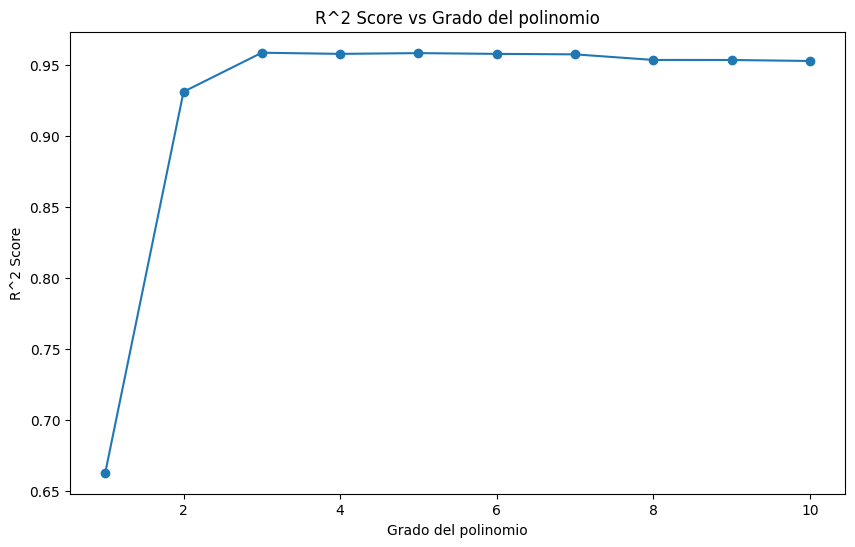

MSE del mejor modelo polinómico: 0.8667664577481183
R^2 del mejor modelo polinómico: 0.9588240233182931

MSE de la regresión lineal simple: 7.094477836848403
R^2 de la regresión lineal simple: 0.6629748978313066


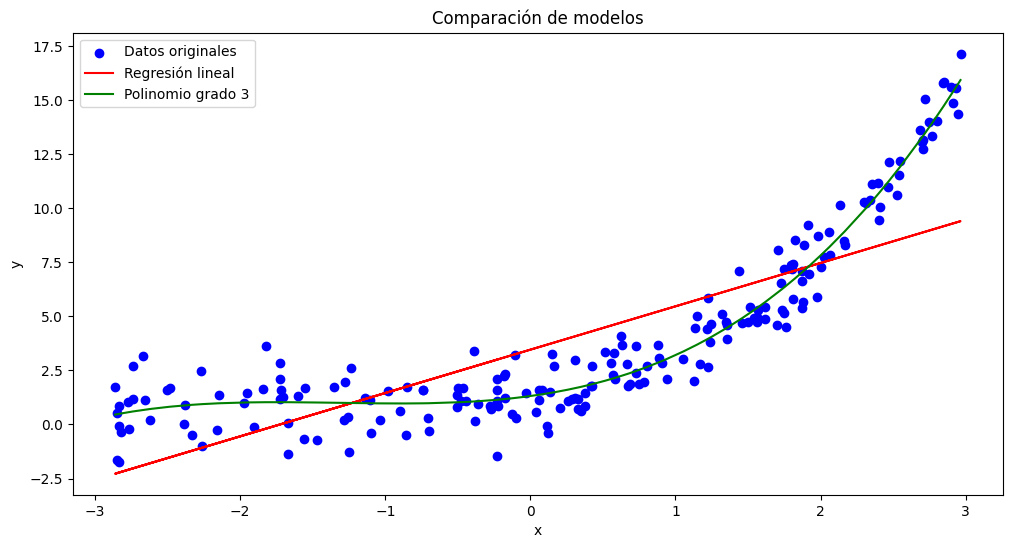

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('regression.csv', header=None, names=['y', 'x'])

X = data['x'].values.reshape(-1, 1)
y = data['y'].values

# a) Determinar el grado del polinomio que mejor se ajusta

max_degree = 10
r2_scores = []

for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

best_degree = np.argmax(r2_scores) + 1

print(f"El mejor grado de polinomio es: {best_degree}")
print(f"R^2 para el mejor grado: {r2_scores[best_degree - 1]}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), r2_scores, marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Grado del polinomio')
plt.show()

# Ajustar el modelo con el mejor grado
best_poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_best_poly = best_poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_best_poly, y, test_size=0.2, random_state=42)

best_model = LinearRegression()
best_model.fit(X_train, y_train)

y_pred_poly = best_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"MSE del mejor modelo polinómico: {mse_poly}")
print(f"R^2 del mejor modelo polinómico: {r2_poly}")

# b) Aplicar regresión lineal simple

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"\nMSE de la regresión lineal simple: {mse_linear}")
print(f"R^2 de la regresión lineal simple: {r2_linear}")

# Comparación visual
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Datos originales')
plt.plot(X, linear_model.predict(X), color='red', label='Regresión lineal')

X_sorted = np.sort(X, axis=0)
X_poly_sorted = best_poly_features.transform(X_sorted)
plt.plot(X_sorted, best_model.predict(X_poly_sorted), color='green', label=f'Polinomio grado {best_degree}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de modelos')
plt.legend()
plt.show()

# Pregunta 15
Determina el mayor y menor valor (absoluto) decimal que puede representarse en punto flotante
de simple precisión (5p)

In [27]:
import numpy as np

# Mayor valor positivo
max_float32 = np.finfo(np.float32).max
print(f"El mayor valor positivo en float32 es: {max_float32}")

# Menor valor positivo normalizado
min_normalized_float32 = np.finfo(np.float32).tiny
print(f"El menor valor positivo normalizado en float32 es: {min_normalized_float32}")

# Menor valor positivo denormalizado (subnormal)
min_denormalized_float32 = np.nextafter(np.float32(0), np.float32(1))
print(f"El menor valor positivo denormalizado en float32 es: {min_denormalized_float32}")

print("\nEn notación científica:")
print(f"Mayor valor: {max_float32:.8e}")
print(f"Menor valor normalizado: {min_normalized_float32:.8e}")
print(f"Menor valor denormalizado: {min_denormalized_float32:.8e}")

El mayor valor positivo en float32 es: 3.4028234663852886e+38
El menor valor positivo normalizado en float32 es: 1.1754943508222875e-38
El menor valor positivo denormalizado en float32 es: 1.401298464324817e-45

En notación científica:
Mayor valor: 3.40282347e+38
Menor valor normalizado: 1.17549435e-38
Menor valor denormalizado: 1.40129846e-45
